In [1]:
!nvidia-sim

/bin/bash: line 1: nvidia-sim: command not found


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [3]:
Task_2=pd.read_csv("/content/drive/MyDrive/task 2 internship.csv")

In [4]:
Task_2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print ("The shape of the  data is (row, column):"+ str(Task_2.shape))
print (Task_2.info())

The shape of the  data is (row, column):(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
Task_2['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
Task_2.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
Task_2.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<Axes: >

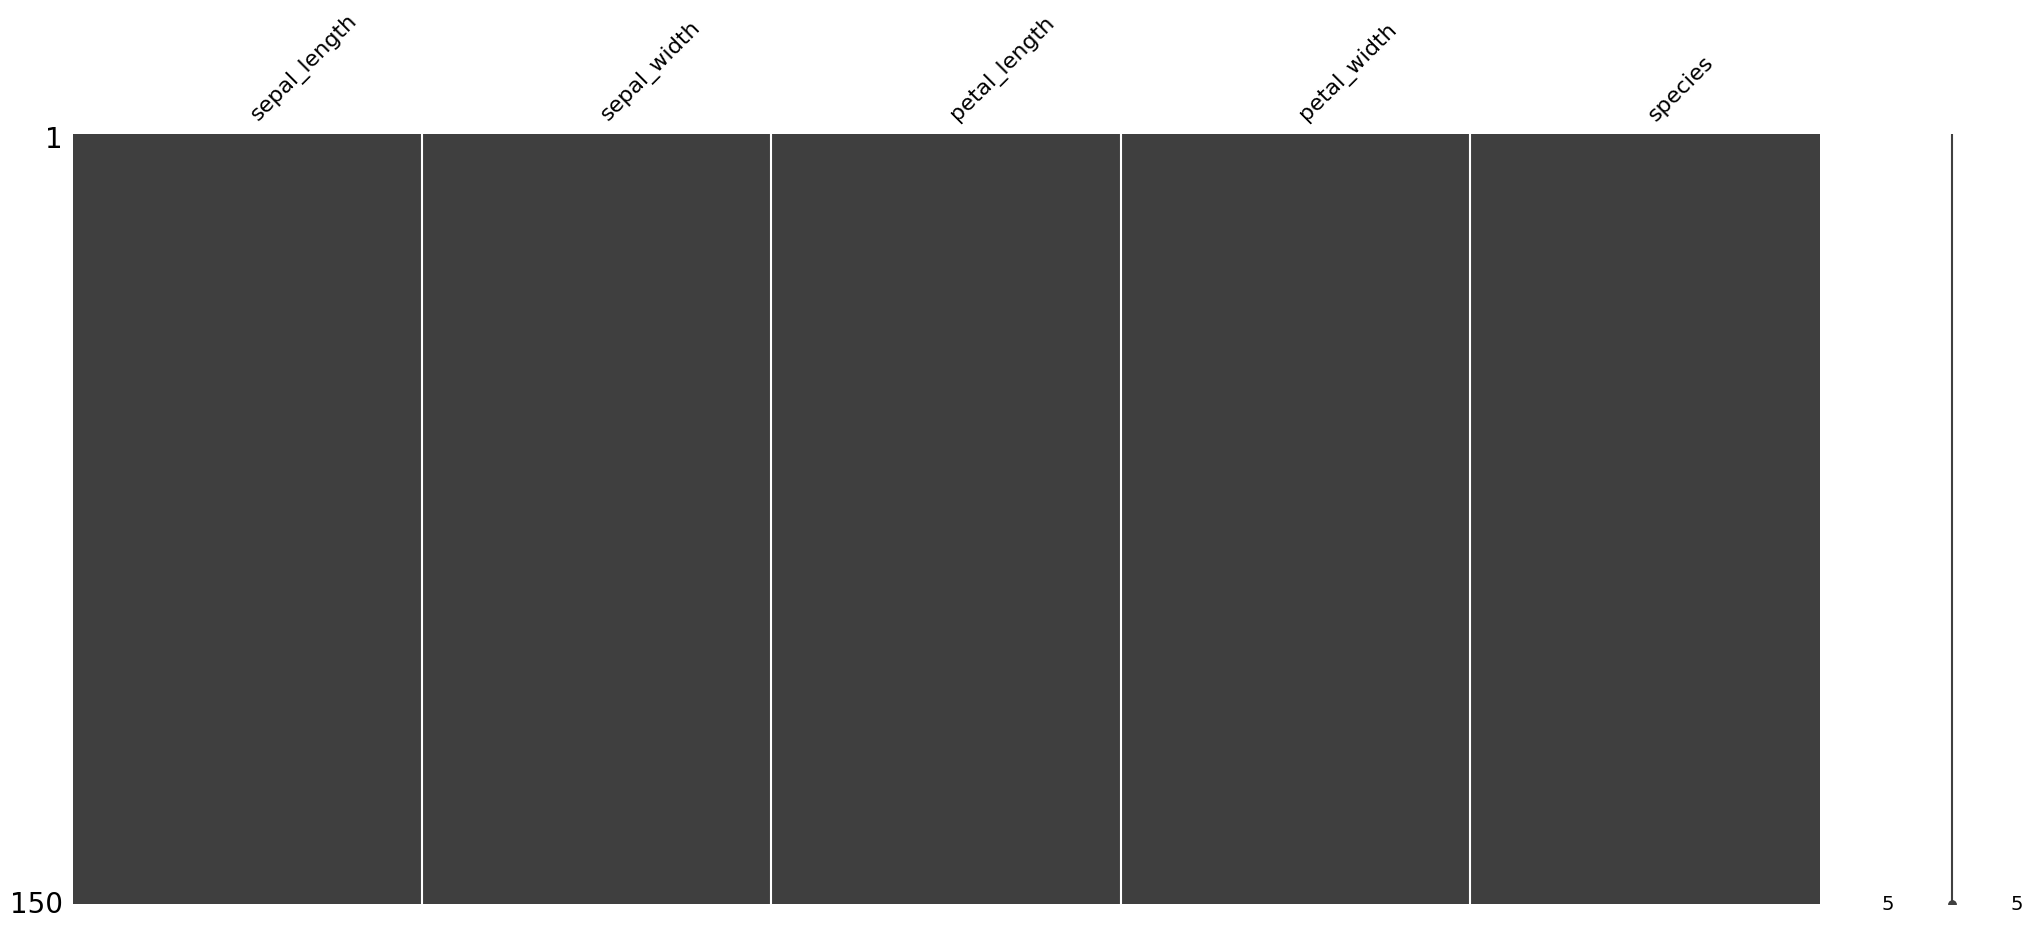

In [9]:
import missingno as msno
msno.matrix(Task_2)

In [10]:
Task_2['sepal_length'].fillna(value=0, inplace=True)
print('sepal_length column with null values:',Task_2['sepal_length'].isnull().sum(), sep = '\n')

sepal_length column with null values:
0


In [11]:
Task_2['sepal_width'].fillna(value=0, inplace=True)
print('sepal_width column with null values:',Task_2['sepal_width'].isnull().sum(), sep = '\n')

sepal_width column with null values:
0


In [12]:
Task_2['petal_length'].fillna(value=0, inplace=True)
print('petal_length column with null values:',Task_2['petal_length'].isnull().sum(), sep = '\n')

petal_length column with null values:
0


In [13]:
Task_2['petal_width'].fillna(value=0, inplace=True)
print('petal_width column with null values:',Task_2['petal_width'].isnull().sum(), sep = '\n')

petal_width column with null values:
0


In [14]:
Task_2['species'].fillna(value=0, inplace=True)
print('species column with null values:',Task_2['species'].isnull().sum(), sep = '\n')

species column with null values:
0


<ipython-input-23-7d6437ae2a9e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, ' percentage of petal_width')

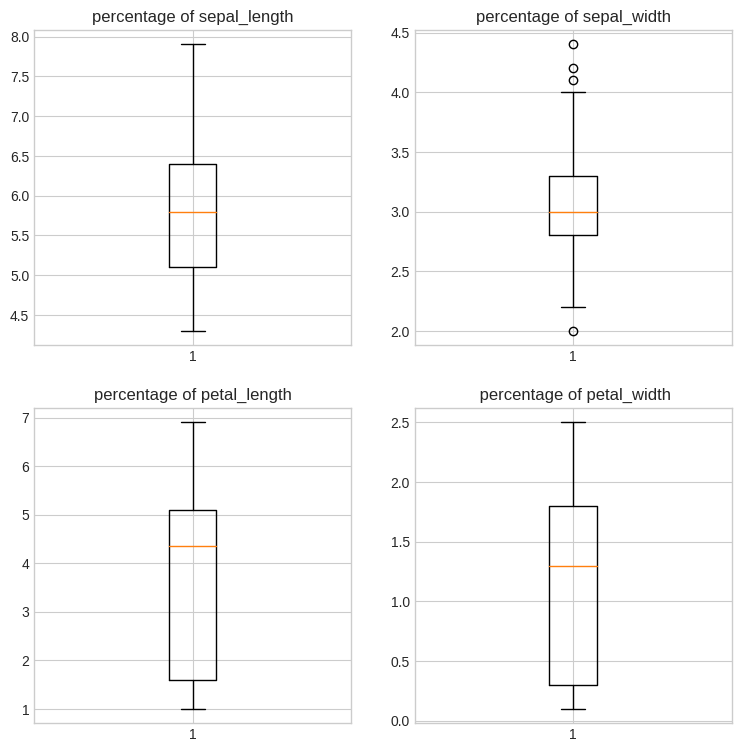

In [23]:
plt.figure(figsize = (9,9))
plt.style.use('seaborn-whitegrid')
ax=plt.subplot(221)
plt.boxplot(Task_2['sepal_length'])
ax.set_title('percentage of sepal_length')
ax=plt.subplot(222)
plt.boxplot(Task_2['sepal_width'])
ax.set_title('percentage of sepal_width')
ax=plt.subplot(223)
plt.boxplot(Task_2['petal_length'])
ax.set_title('percentage of petal_length')
ax=plt.subplot(224)
plt.boxplot(Task_2 ['petal_width'])
ax.set_title(' percentage of petal_width')

In [26]:
Q1 = Task_2['sepal_length'].quantile(0.25)
Q3 = Task_2['sepal_length'].quantile(0.75)
IQR = Q3 - Q1
filter = (Task_2['sepal_length'] >= Q1 - 1.5 * IQR) & (Task_2['sepal_length'] <= Q3 + 1.5 *IQR)
Task_2=Task_2.loc[filter]

<ipython-input-27-054e53d58eb8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'After removing outliers(sepal_length)')

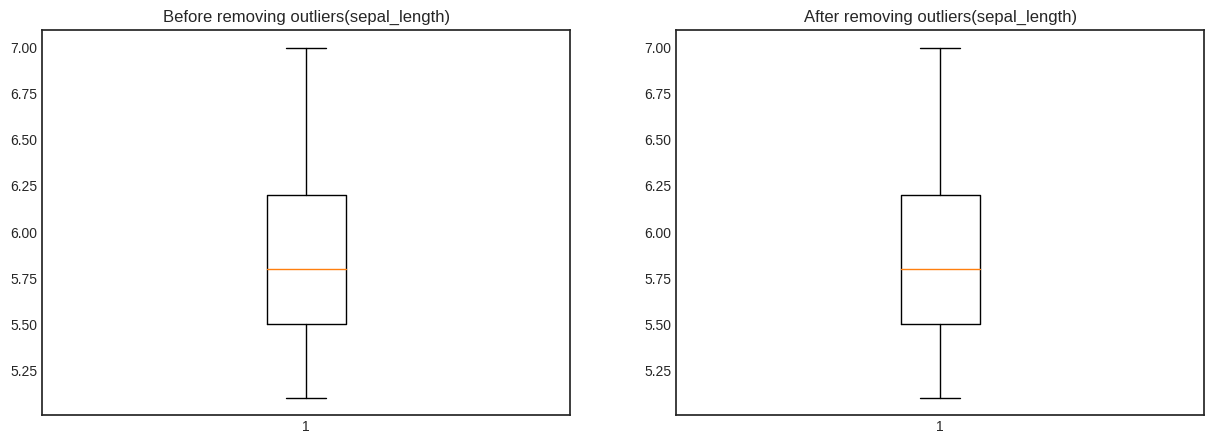

In [27]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(Task_2['sepal_length'])
ax.set_title('Before removing outliers(sepal_length)')
ax=plt.subplot(122)
plt.boxplot(Task_2['sepal_length'])
ax.set_title('After removing outliers(sepal_length)')

<Axes: xlabel='species', ylabel='count'>

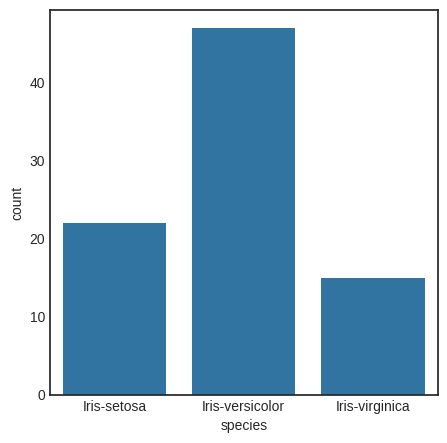

In [28]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x='species',data=Task_2)

In [30]:
Task_2.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

<Axes: >

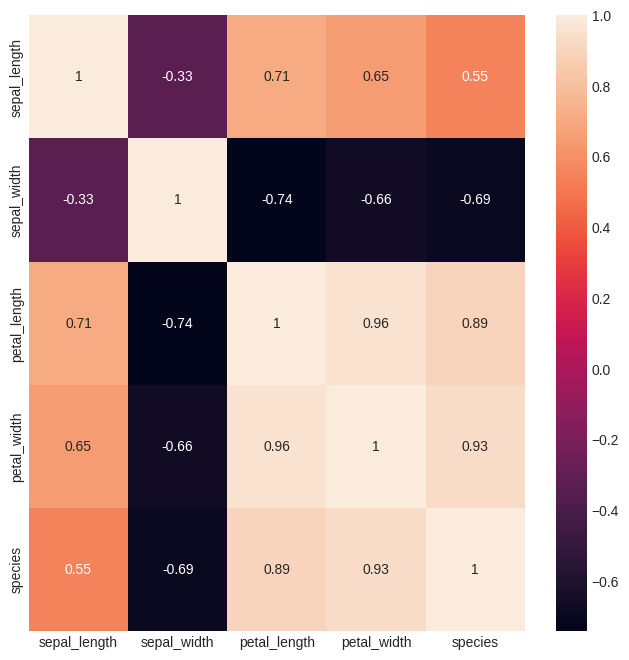

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(Task_2.corr(),annot=True)

In [37]:
A=Task_2.drop(columns='species')
B=Task_2['species']
print(A,B)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
5             5.4          3.9           1.7          0.4
10            5.4          3.7           1.5          0.2
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
..            ...          ...           ...          ...
138           6.0          3.0           4.8          1.8
141           6.9          3.1           5.1          2.3
142           5.8          2.7           5.1          1.9
146           6.3          2.5           5.0          1.9
149           5.9          3.0           5.1          1.8

[84 rows x 4 columns] 0      0
5      0
10     0
14     0
15     0
      ..
138    2
141    2
142    2
146    2
149    2
Name: species, Length: 84, dtype: int64


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [70]:
A_train,A_test,B_train,B_test=train_test_split(A,B,test_size=0.1,stratify=B,random_state=1)
A_train

,sepal_length,sepal_width,petal_length,petal_width
53,5.5,2.3,4.0,1.3
141,6.9,3.1,5.1,2.3
90,5.5,2.6,4.4,1.2
48,5.3,3.7,1.5,0.2
73,6.1,2.8,4.7,1.2
...,...,...,...,...
72,6.3,2.5,4.9,1.5
91,6.1,3.0,4.6,1.4
71,6.1,2.8,4.0,1.3
149,5.9,3.0,5.1,1.8


In [71]:
logreg=LogisticRegression()
logreg.fit(A_train,B_train)

LogisticRegression()

In [72]:
A_train_prediction=logreg.predict(A_train)
training_data_accuracy=accuracy_score(A_train_prediction,B_train)
print('accuracy for traning data is',training_data_accuracy)

accuracy for traning data is 0.9333333333333333


In [73]:
A_test_prediction=logreg.predict(A_test)
test_data_accuracy=accuracy_score(A_test_prediction,B_test)
print('accuracy for test data is',test_data_accuracy)

accuracy for test data is 0.8888888888888888


In [74]:
ab=DecisionTreeClassifier().fit(A_train,B_train)

In [75]:
A_train_prediction=ab.predict(A_train)
training_data_accuracy=accuracy_score(A_train_prediction,B_train)
print('accuracy for training data is',training_data_accuracy)

accuracy for training data is 1.0


In [76]:
A_test_prediction=ab.predict(A_test)
test_data_accuracy=accuracy_score(A_test_prediction,B_test)
print('accuracy for test data is',test_data_accuracy)

accuracy for test data is 0.8888888888888888


In [77]:
knn=KNeighborsClassifier()
knn.fit(A_train,B_train)

KNeighborsClassifier()

In [78]:
A_train_prediction=knn.predict(A_train)
training_Data_accuracy=accuracy_score(A_train_prediction,B_train)
print("accuracy for training data is",training_data_accuracy)

accuracy for training data is 1.0


In [79]:
A_test_prediction=knn.predict(A_test)
test_data_accuracy=accuracy_score(A_test_prediction,B_test)
print('accuracy for test data is',test_data_accuracy)

accuracy for test data is 1.0


In [80]:
Data=(5.7,2.5,5.0,2.0)
Data_as_numpy_array=np.asarray(Data)

In [81]:
Data_reshaped=Data_as_numpy_array.reshape(1,-1)

In [82]:
print('Prediction Model    |    PredictedValues')
prediction=logreg.predict(Data_reshaped)
print('Logistic regression       ',prediction[0])
prediction=ab.predict(Data_reshaped)
print('Decision tree             ',prediction[0])
prediction=knn.predict(Data_reshaped)
print('Knn                       ',prediction[0])

Prediction Model    |    PredictedValues
Logistic regression        2
Decision tree              2
Knn                        2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
